In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, box
import shapely
import fiona
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')
pd.options.display.max_columns = None
import datetime as dt
import math

In [3]:
ls ../data/

538_approval_polllist.csv
538_approval_topline.csv
Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv
Public_Health_Statistics-_Selected_underlying_causes_of_death_in_Chicago__2006___2010.csv
TIF_Funding_Sources_and_Uses_by_TIF__Fiscal_Year__and_Type.csv
__pycache__/
data_processing.py
dkos18.csv
generic_polllist.csv*
generic_topline.csv*
pollster-ratings.csv
pollster-ratings_528csv.csv
raw-polls_528.csv
special-elections_538.csv
standardized_report.csv


In [4]:
gen_pollist = pd.read_csv('../data/generic_polllist.csv') 

In [5]:
gen_pollist.shape

(1808, 21)

In [6]:
gen_pollist.head()

,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,dem,rep,adjusted_dem,adjusted_rep,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,All polls,7/6/2018,1/23/2017,1/24/2017,Public Policy Polling,B,1043.0,rv,0.979926,0.0,48.0,40.0,46.75253,39.81252,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,49237,78153,5/24/2017,11:22:10 6 Jul 2018
1,All polls,7/6/2018,1/30/2017,1/31/2017,Public Policy Polling,B,725.0,rv,0.644781,0.0,45.0,42.0,43.75253,41.81252,NaN,NaN,http://www.publicpolicypolling.com/pdf/2017/PP...,49238,78151,5/24/2017,11:22:10 6 Jul 2018
2,All polls,7/6/2018,2/2/2017,2/6/2017,McLaughlin & Associates,C-,1000.0,lv,0.606763,0.0,42.4,44.0,44.39123,41.50348,NaN,NaN,http://mclaughlinonline.com/2017/11/16/ma-nati...,50468,79643,11/16/2017,11:22:10 6 Jul 2018
3,All polls,7/6/2018,2/5/2017,2/6/2017,Emerson College,B+,617.0,rv,1.095338,0.0,48.1,46.3,48.24675,45.27032,NaN,NaN,http://media.wix.com/ugd/3bebb2_ad9933217cc64d...,49292,78251,5/31/2017,11:22:10 6 Jul 2018
4,All polls,7/6/2018,2/7/2017,2/8/2017,Public Policy Polling,B,712.0,rv,0.627017,0.0,49.0,41.0,47.75253,40.81252,NaN,NaN,http://www.publicpolicypolling.com/pdf/2017/PP...,49287,78162,5/24/2017,11:22:10 6 Jul 2018


In [7]:
gen_topline = pd.read_csv('../data/generic_topline.csv')

In [8]:
gen_topline.shape

(1333, 9)

In [9]:
gen_topline.head()

,subgroup,modeldate,dem_estimate,dem_hi,dem_lo,rep_estimate,rep_hi,rep_lo,timestamp
0,Voters,7/6/2018,47.01254,51.32240,42.70268,38.33332,42.46942,34.19721,11:22:17 6 Jul 2018
1,Adults,7/6/2018,44.19642,49.57940,38.81344,37.09481,43.12139,31.06823,11:22:12 6 Jul 2018
2,All polls,7/6/2018,46.82811,51.38687,42.26935,38.39602,42.52263,34.26940,11:22:10 6 Jul 2018
3,Voters,7/5/2018,47.66444,52.14387,43.18502,39.64605,43.88448,35.40762,11:00:21 5 Jul 2018
4,Adults,7/5/2018,44.19642,49.57940,38.81344,37.09481,43.12139,31.06823,11:00:16 5 Jul 2018


In [10]:
gen_pollist.dtypes

subgroup          object
modeldate         object
startdate         object
enddate           object
pollster          object
grade             object
samplesize       float64
population        object
weight           float64
influence        float64
dem              float64
rep              float64
adjusted_dem     float64
adjusted_rep     float64
multiversions    float64
tracking          object
url               object
poll_id            int64
question_id        int64
createddate       object
timestamp         object
dtype: object

In [11]:
gen_pollist['timestamp'] = pd.to_datetime(gen_pollist['timestamp'])
gen_pollist['startdate'] = pd.to_datetime(gen_pollist['startdate'])
gen_pollist['enddate'] = pd.to_datetime(gen_pollist['enddate'])
gen_pollist['modeldate'] = pd.to_datetime(gen_pollist['modeldate'])
gen_pollist.dtypes

subgroup                 object
modeldate        datetime64[ns]
startdate        datetime64[ns]
enddate          datetime64[ns]
pollster                 object
grade                    object
samplesize              float64
population               object
weight                  float64
influence               float64
dem                     float64
rep                     float64
adjusted_dem            float64
adjusted_rep            float64
multiversions           float64
tracking                 object
url                      object
poll_id                   int64
question_id               int64
createddate              object
timestamp        datetime64[ns]
dtype: object

In [12]:
gen_pollist.head()

,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,dem,rep,adjusted_dem,adjusted_rep,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,All polls,2018-07-06,2017-01-23,2017-01-24,Public Policy Polling,B,1043.0,rv,0.979926,0.0,48.0,40.0,46.75253,39.81252,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,49237,78153,5/24/2017,2018-07-06 11:22:10
1,All polls,2018-07-06,2017-01-30,2017-01-31,Public Policy Polling,B,725.0,rv,0.644781,0.0,45.0,42.0,43.75253,41.81252,NaN,NaN,http://www.publicpolicypolling.com/pdf/2017/PP...,49238,78151,5/24/2017,2018-07-06 11:22:10
2,All polls,2018-07-06,2017-02-02,2017-02-06,McLaughlin & Associates,C-,1000.0,lv,0.606763,0.0,42.4,44.0,44.39123,41.50348,NaN,NaN,http://mclaughlinonline.com/2017/11/16/ma-nati...,50468,79643,11/16/2017,2018-07-06 11:22:10
3,All polls,2018-07-06,2017-02-05,2017-02-06,Emerson College,B+,617.0,rv,1.095338,0.0,48.1,46.3,48.24675,45.27032,NaN,NaN,http://media.wix.com/ugd/3bebb2_ad9933217cc64d...,49292,78251,5/31/2017,2018-07-06 11:22:10
4,All polls,2018-07-06,2017-02-07,2017-02-08,Public Policy Polling,B,712.0,rv,0.627017,0.0,49.0,41.0,47.75253,40.81252,NaN,NaN,http://www.publicpolicypolling.com/pdf/2017/PP...,49287,78162,5/24/2017,2018-07-06 11:22:10


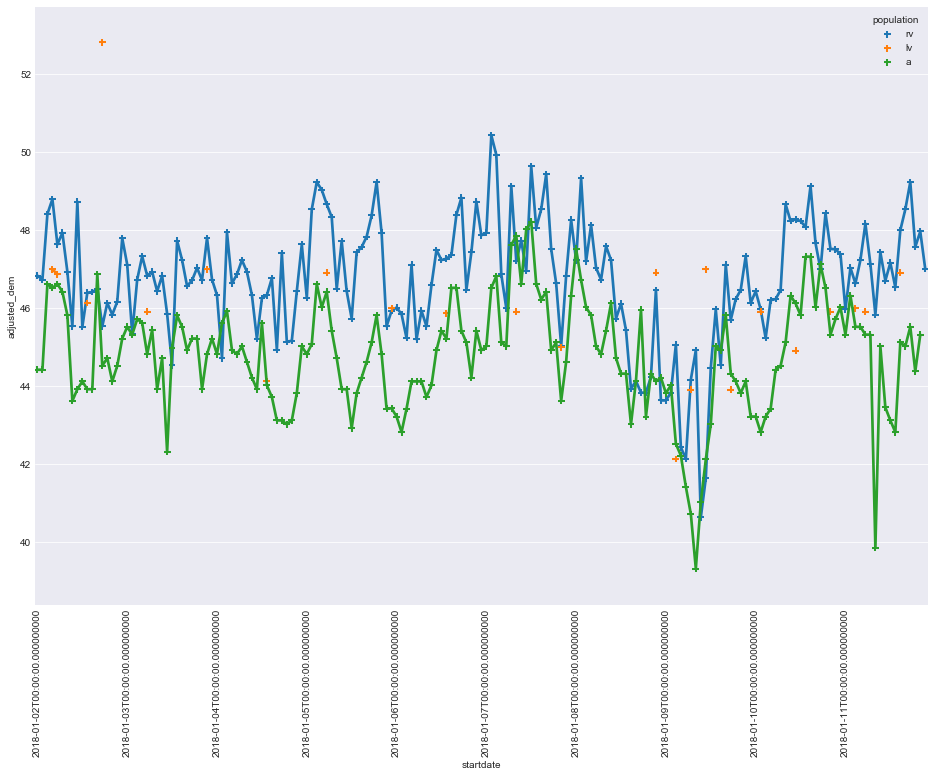

In [13]:
sns.pointplot(data=gen_pollist[gen_pollist['startdate']>dt.datetime(2018, 1, 1)],
              x='startdate', y='adjusted_dem', ci=None, hue='population', markers='+')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)

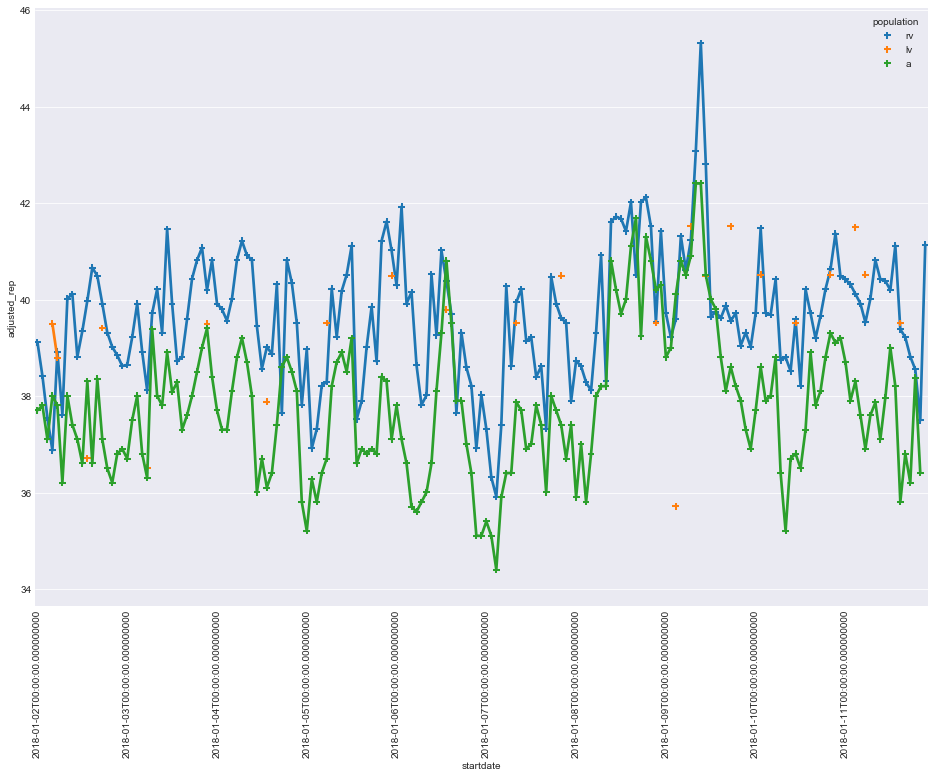

In [14]:
sns.pointplot(data=gen_pollist[gen_pollist['startdate']>dt.datetime(2018, 1, 1)],
              x='startdate', y='adjusted_rep', ci=None, hue='population', markers='+')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)

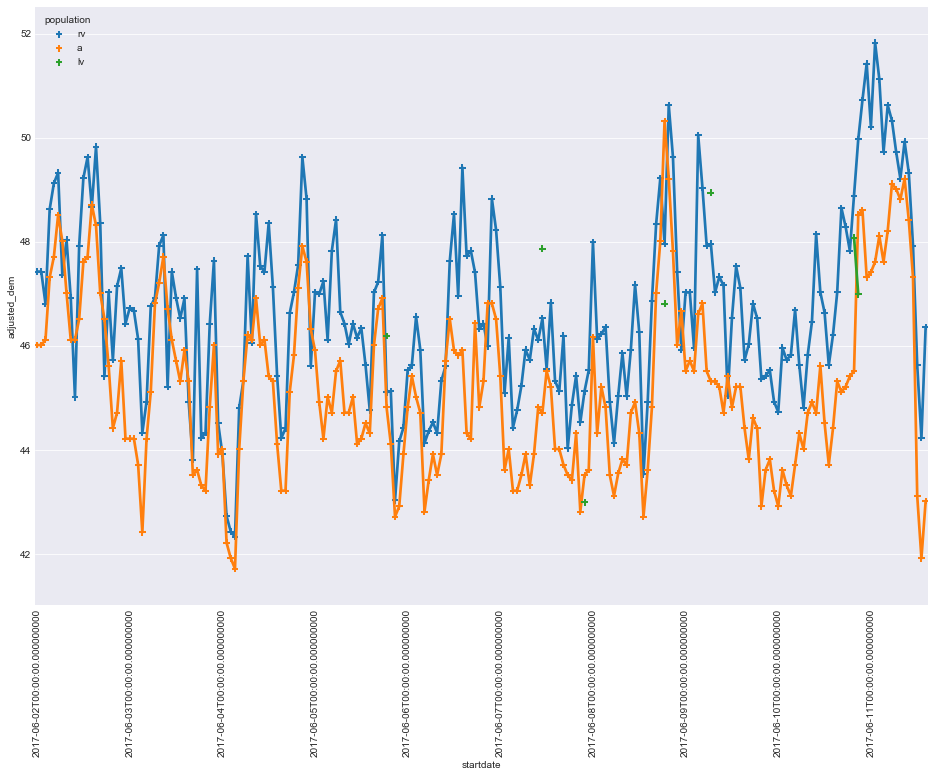

In [15]:
sns.pointplot(data=gen_pollist[(gen_pollist['startdate']>dt.datetime(2017, 6, 1))&(gen_pollist['startdate']<dt.datetime(2018, 1, 1))],
              x='startdate', y='adjusted_dem', ci=None, hue='population', markers='+')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)

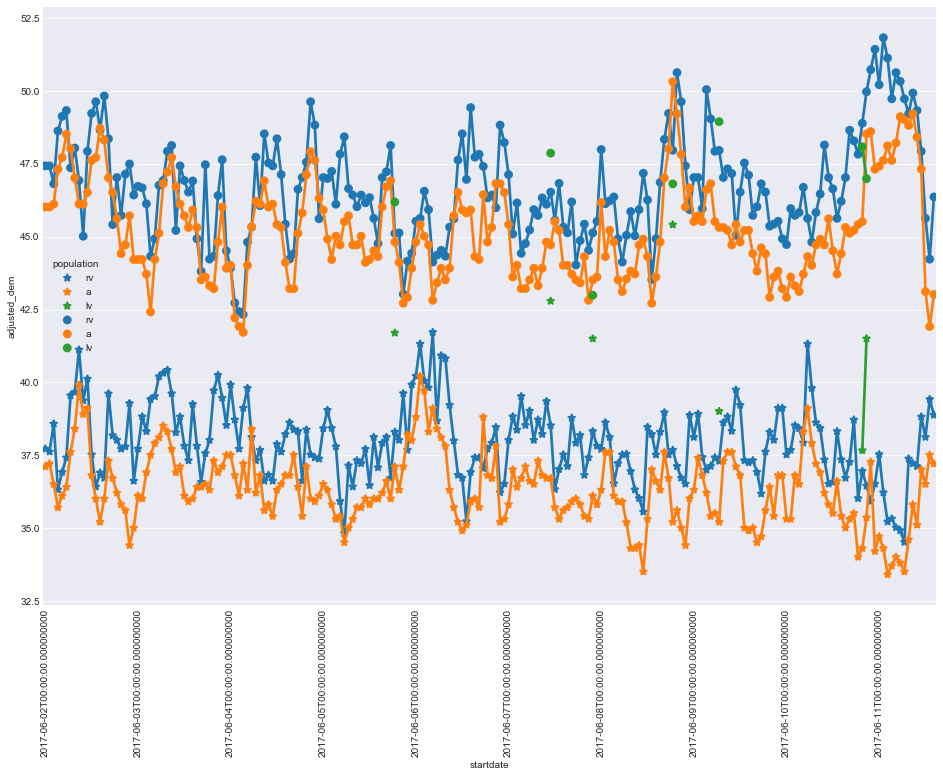

In [16]:
sns.pointplot(data=gen_pollist[(gen_pollist['startdate']>dt.datetime(2017, 6, 1))&(gen_pollist['startdate']<dt.datetime(2018, 1, 1))],
              x='startdate', y='adjusted_rep', ci=None, hue='population', markers='*')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)
sns.pointplot(data=gen_pollist[(gen_pollist['startdate']>dt.datetime(2017, 6, 1))&(gen_pollist['startdate']<dt.datetime(2018, 1, 1))],
              x='startdate', y='adjusted_dem', ci=None, hue='population')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)

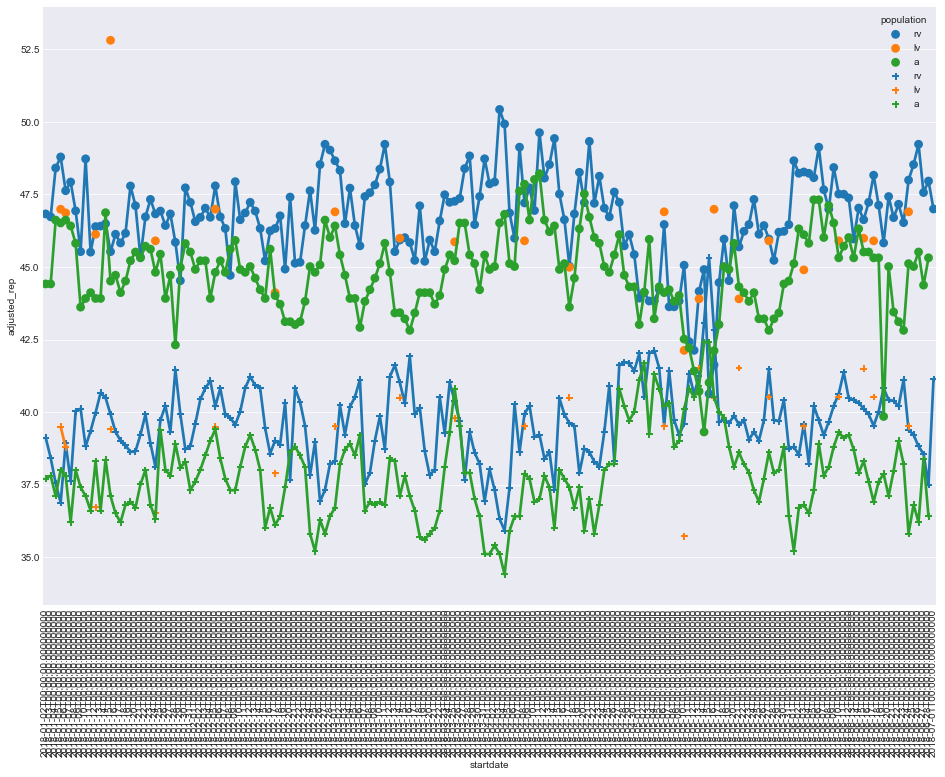

In [17]:
sns.pointplot(data=gen_pollist[gen_pollist['startdate']>dt.datetime(2018, 1, 1)],
              x='startdate', y='adjusted_dem', ci=None, hue='population', markers='o')
plt.xticks(rotation=90)
#plt.locator_params(axis='x', nbins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)
sns.pointplot(data=gen_pollist[gen_pollist['startdate']>dt.datetime(2018, 1, 1)],
              x='startdate', y='adjusted_rep', ci=None, hue='population', markers='+')
plt.xticks(rotation=90)
#plt.locator_params(axis='x', nbins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)


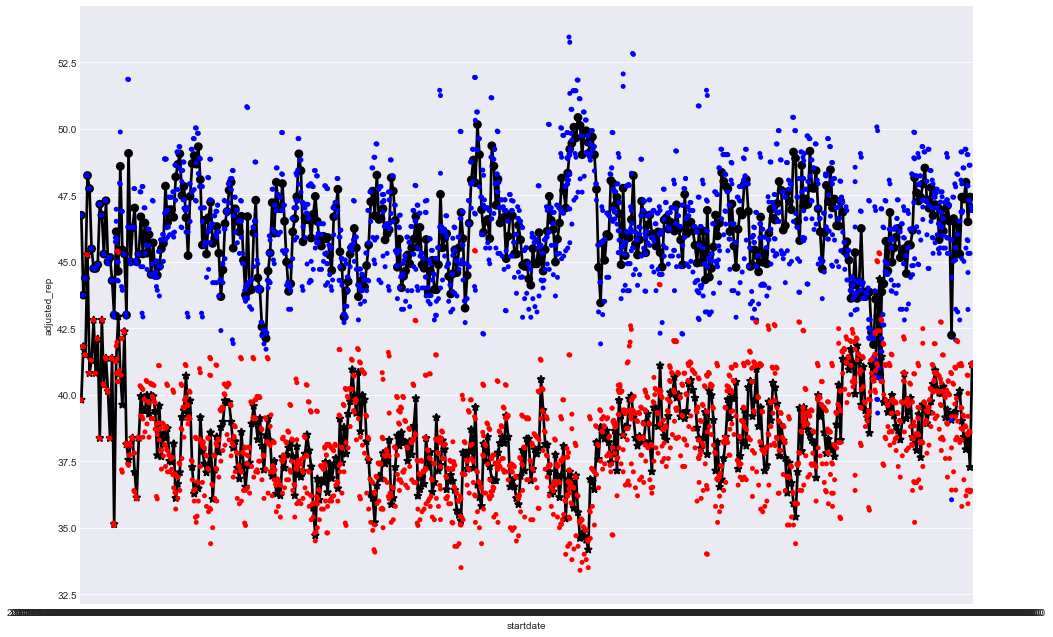

In [19]:
sns.swarmplot(y=gen_pollist.adjusted_dem, x=gen_pollist.startdate, color='b')
sns.pointplot(data=gen_pollist,
              x='startdate', y='adjusted_dem', ci=None, markers='o', color='black')

sns.swarmplot(y=gen_pollist.adjusted_rep, x=gen_pollist.startdate, color='r')
sns.pointplot(data=gen_pollist,
              x='startdate', y='adjusted_rep', ci=None, markers='*', color='black')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)


In [28]:
moving_avg = []
accum = []
for x in gen_pollist['adjusted_dem'][:]:
    accum.append(x)
    mean = np.mean(accum) 
    moving_avg.append(mean)

In [40]:
r_moving_avg = []
r_accum = []
for x in gen_pollist['adjusted_rep'][:]:
    r_accum.append(x)
    r_mean = np.mean(r_accum) 
    r_moving_avg.append(r_mean)

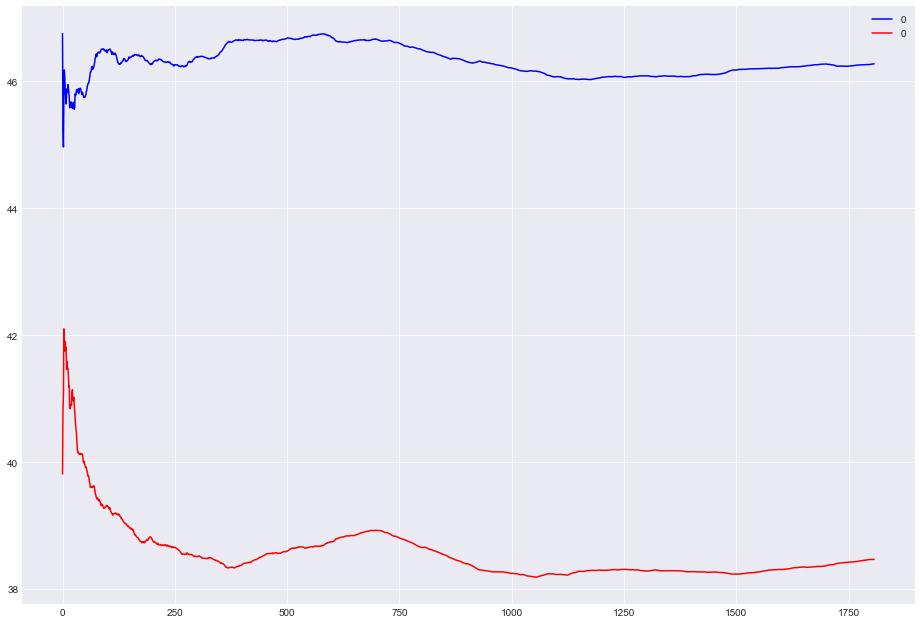

In [45]:
ax = pd.DataFrame(moving_avg).plot(color='blue', label='dem')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)
pd.DataFrame(r_moving_avg).plot(color='red', ax=ax, legend=True)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)